In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
import scipy.stats
from matplotlib import cm
import pickle

In [3]:
jetdic = pickle.load( open( "../JET_OUT/jettrack_2D.p", "rb" ) )

In [4]:
ERA5 = jetdic['ERA5']

In [5]:
def is_winter(month):
    return (month == 4) | (month == 5) | (month == 6) | (month == 7) | (month == 8) | (month == 9)


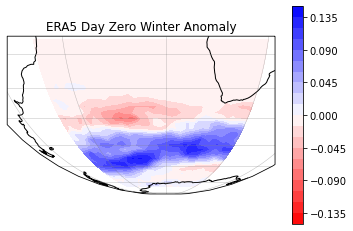

In [6]:
D0 = ERA5.sel(time=slice('2015', '2017'))

clim = ERA5.where(is_winter(ERA5.time.dt.month)).mean(dim='time',skipna=True)
D0 = D0.where(is_winter(D0.time.dt.month)).mean(dim='time',skipna=True)


levels = np.linspace(-0.15,0.15, 21)

ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()
plt.rcParams['hatch.linewidth']=0.4
plt.rcParams['hatch.color']='black'
c = ax.contourf(clim.lon,clim.lat,D0-clim,cmap='bwr_r',levels = levels,transform = ccrs.PlateCarree())
plt.title('ERA5 Day Zero Winter Anomaly')
ax.set_extent([-50, 32, -15, -85], ccrs.PlateCarree())
plt.colorbar(c)
ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../JET_OUT/Day_Zero_2D/D0_anom.pdf')
plt.savefig('../JET_OUT/Day_Zero_2D/D0_anom.png',dpi=1200)
plt.savefig('../JET_OUT/Day_Zero_2D/D0_anom.svg', format='svg', dpi=1200)
plt.show()
